In [1]:
from jacobi import propagate, jacobi
import numpy as np
from matplotlib import pyplot as plt
import timeit

In [2]:
def fn(x):
    return np.log(3 * x + 1)

n = np.geomspace(1, 1e2, 10).astype(int)

t = {False: [], True: [], "noopt": []}
for ni in n:
    x = np.linspace(1, 10, ni)
    xcov = np.eye(ni)
    for key in t:
        if key in (False, True):
            timer = timeit.Timer(f"propagate(fn, x, xcov, diagonal={key})",
                                 globals=locals())
            k, ti = timer.autorange()
            t[key].append(ti / k)
        else:
            import jacobi._propagate

            orig = jacobi._propagate._try_reduce_jacobian
            jacobi._propagate._try_reduce_jacobian = lambda x: x

            timer = timeit.Timer(f"propagate(fn, x, xcov, diagonal=False)",
                                 globals=locals())
            k, ti = timer.autorange()
            t[key].append(ti / k)

            jacobi._propagate._try_reduce_jacobian = orig


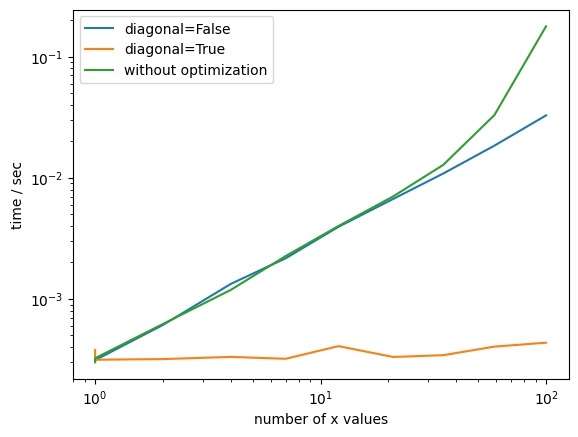

In [3]:
for key, val in t.items():
    plt.plot(n, val, label=f"diagonal={key}" if key in (False, True) else "without optimization")
plt.loglog()
plt.legend()
plt.xlabel("number of x values")
plt.ylabel("time / sec");